# Prediction Using Decision Tree Algorithm

## THE SPARKS FOUNDATION

## DOMAIN: DATA SCIENCE & BUSINESS ANALYTICS

## AUTHOR: KUMUD KUMAR

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

### 1. Data Preprocessing

In [2]:
df=pd.read_csv("Task6.csv")

In [3]:
# datframe shape
print("Shape of dataset is:", df.shape)
print("There are total", df.shape[0], "rows")

Shape of dataset is: (150, 6)
There are total 150 rows


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#checking for duplicates
df.duplicated().sum()

0

In [8]:
#Statistical Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [9]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
# let us introduce another attribute named class for the dataset
# df['Class']=df['Species']
# df['Class'].replace(to_replace=['Iris-setosa','Iris-versicolor','Iris-virginica'], value=['1','2','3'], inplace=True)

### 2. EDA

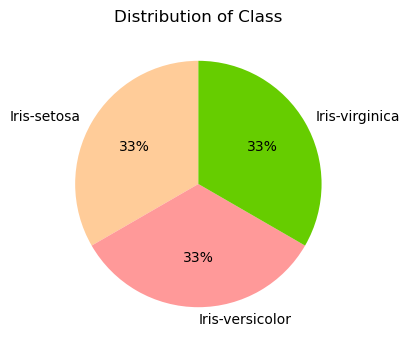

In [12]:
#Class distribution 
fig = plt.figure(figsize = (12, 4))


g = (df['Species'].value_counts()
    .plot(kind = 'pie', autopct = '%.0f%%', 
          labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
          colors = ['#ffcc99', '#ff9999', '#66CD00'], 
          startangle = 90, 
          title = 'Distribution of Class', fontsize = 10)
    .set_ylabel(''))

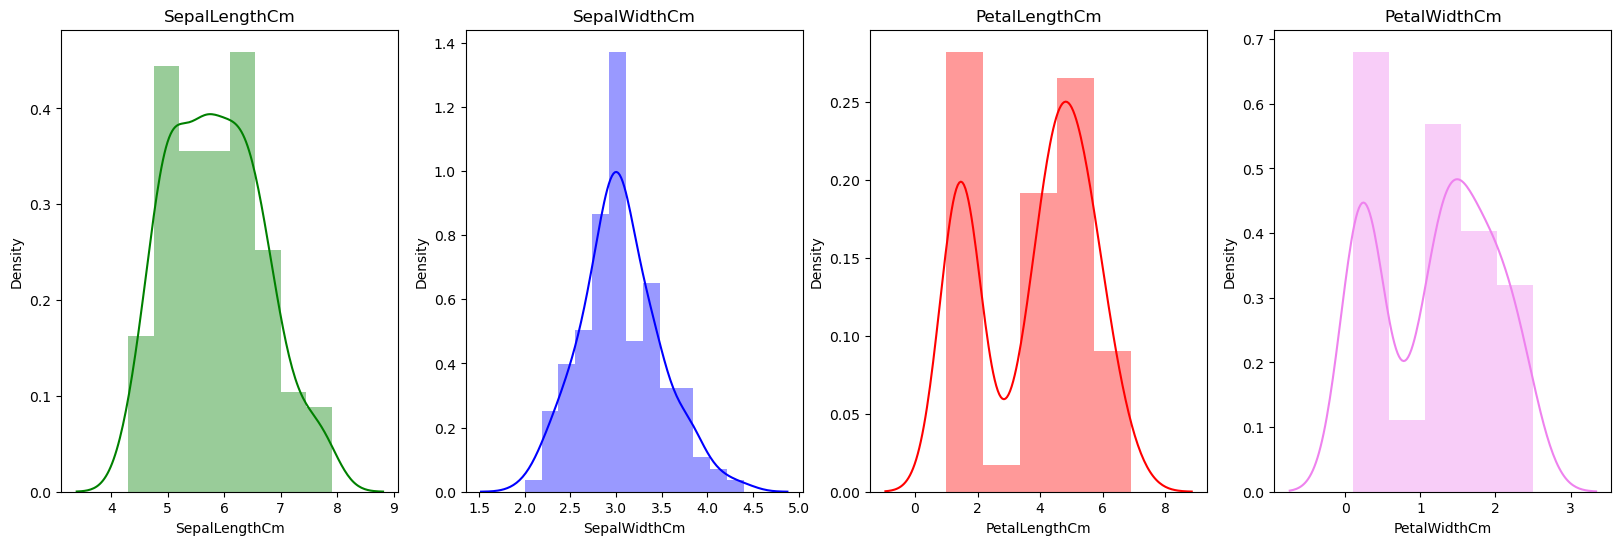

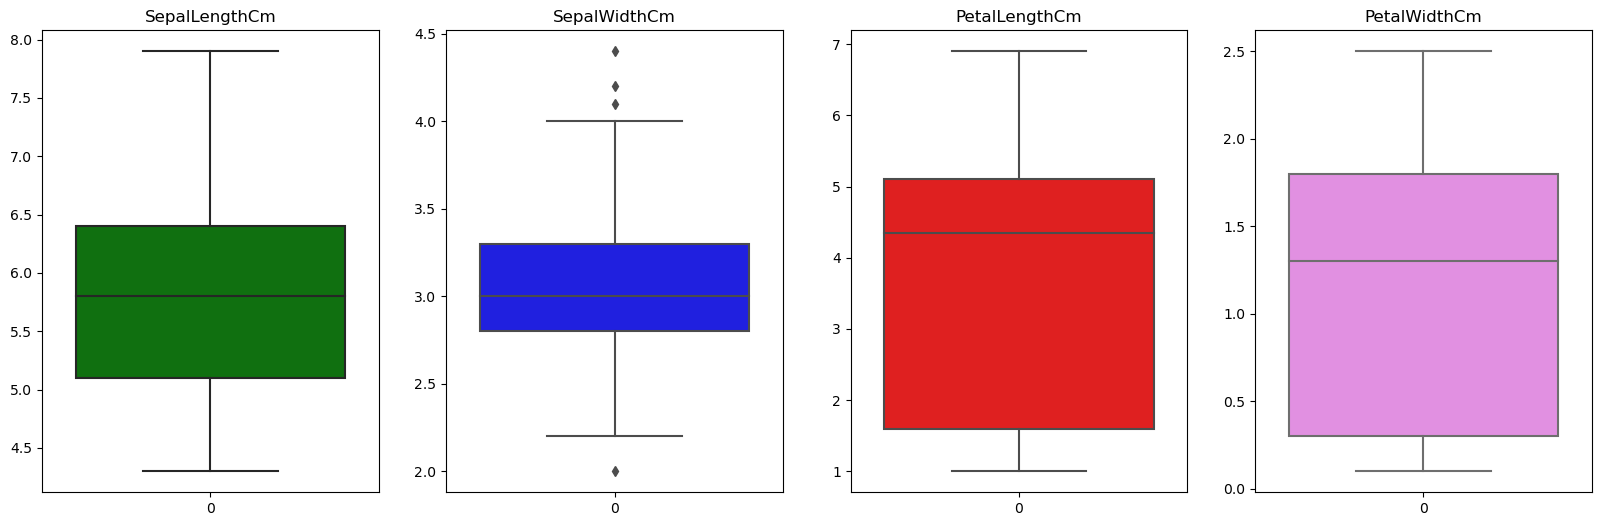

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('SepalLengthCm')
sns.distplot(df['SepalLengthCm'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('SepalWidthCm')
sns.distplot(df['SepalWidthCm'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('PetalLengthCm')
sns.distplot(df['PetalLengthCm'],color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('PetalWidthCm')
sns.distplot(df['PetalWidthCm'],color='violet')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('SepalLengthCm')
sns.boxplot(df['SepalLengthCm'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('SepalWidthCm')
sns.boxplot(df['SepalWidthCm'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('PetalLengthCm')
sns.boxplot(df['PetalLengthCm'],orient='vertical',color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('PetalWidthCm')
sns.boxplot(df['PetalWidthCm'],orient='vertical',color='violet')

plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

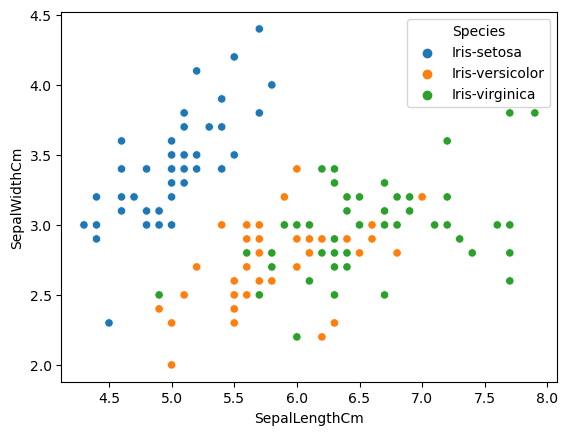

In [43]:
#plotting scatterplot for categories 

sns.scatterplot(df,x='SepalLengthCm',y='SepalWidthCm', hue='Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

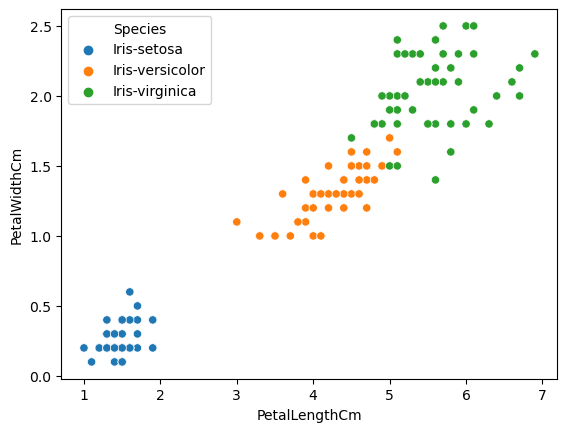

In [15]:
sns.scatterplot(df,x='PetalLengthCm',y='PetalWidthCm', hue='Species')

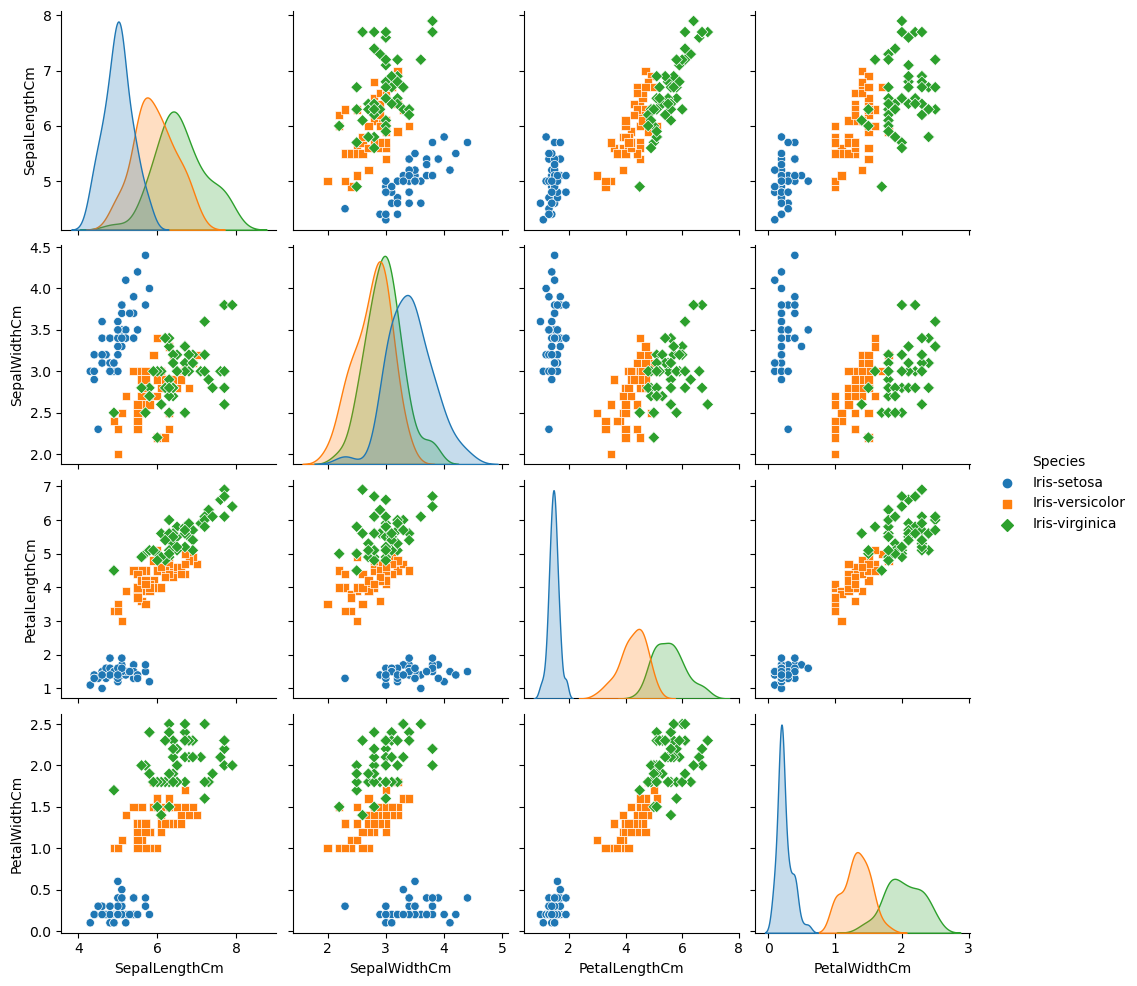

In [16]:
new_df=df.drop(columns=['Id'])
sns.pairplot(new_df, hue='Species', markers=["o", "s", "D"])

### 3. Spliting data

In [17]:
# Setting attributes and target variables
X=df.drop(columns=["Id",'Species'], axis=1)
y=df['Species']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### 4. Building Decision tree classifietr

In [65]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [66]:
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

1.0
0.9555555555555556


In [67]:
dtc.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

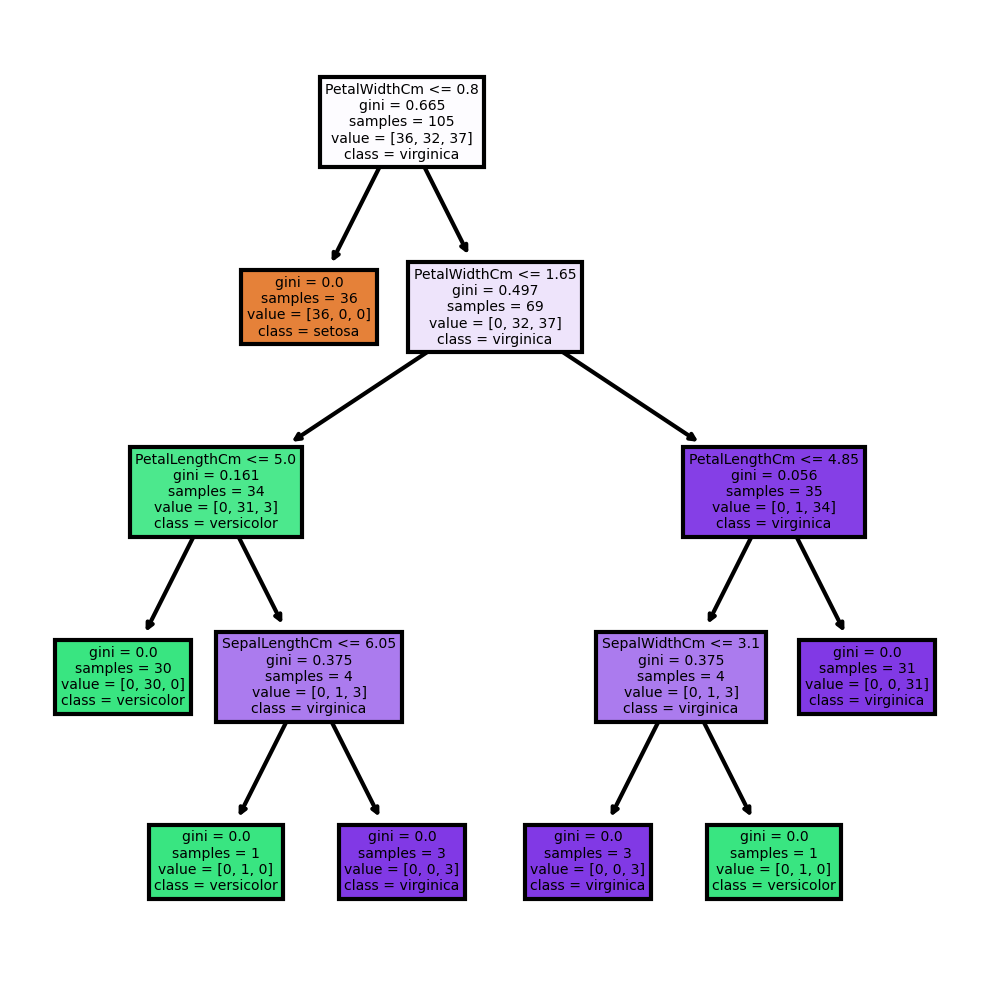

In [68]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dtc, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [69]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtc.feature_importances_, columns = ["Imp"], index = X_train.columns))

                    Imp
SepalLengthCm  0.021469
SepalWidthCm   0.021469
PetalLengthCm  0.063170
PetalWidthCm   0.893892


In [70]:
# to reduce overfitting we have tweaked some parameters
# taking max_depth as 3, random state 1

dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9809523809523809
0.9555555555555556


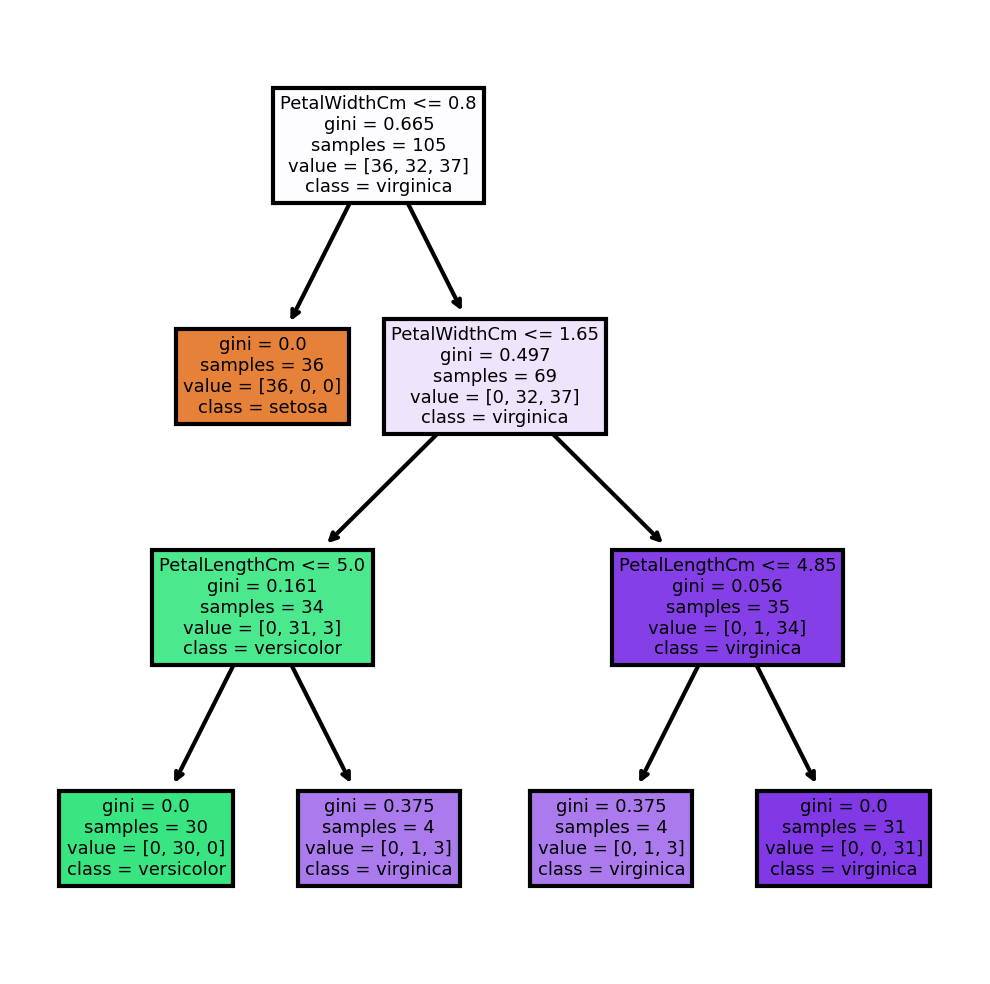

In [71]:
fn = list(X_train)
cn = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree1.png')

In [72]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                    Imp
SepalLengthCm  0.000000
SepalWidthCm   0.000000
PetalLengthCm  0.066004
PetalWidthCm   0.933996


#### Conclusion:  
     As its evident PetalWidth is an important feature in predicting the correct class. 

### 5. Confusion matrix

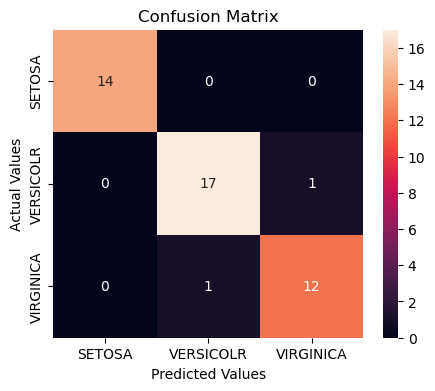

In [80]:
#Plotting the confusion matrix

y_pred = dTree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()